In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [3]:
pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.1 MB/s eta 0:00:00


In [5]:
os.chdir("/content/drive/MyDrive/DSCI 531")
os.getcwd()

'/content/drive/MyDrive/DSCI 531'

In [6]:
data = pd.read_csv("yourStataFile.csv")
data

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V618,V619,V620,V621,V622,V623,V624,V625,V626,V627
0,1,8973,2,1,1,17,1,520400,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,0,15,98,14,11,1
1,2,8973,2,1,2,17,1,530100,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,0,14,11,14,10,3
2,3,8973,2,1,3,17,1,530200,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,0,15,4,15,3,3
3,4,8973,2,1,4,17,1,530300,3,INTENSIVE TREATMENT UNIT,...,0,0,0,0,0,14,9,14,8,3
4,5,8973,2,1,5,17,1,530800,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,0,15,1,15,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1103,8973,2,1,1103,17,50,510200,2,OUTAGAMIE CO SHELTER,...,0,0,0,0,0,15,3,14,9,2
1103,1104,8973,2,1,1104,17,50,500100,2,RACINE CO DETENTION CENTER,...,0,1,0,0,0,15,4,14,10,1
1104,1105,8973,2,1,1105,17,50,510200,2,ROCK CO YOUTH HOME,...,0,0,0,0,0,15,9,15,2,2
1105,1106,8973,2,1,1106,17,51,530300,4,WYOMING BOYS@ SCHOOL,...,0,0,0,0,0,15,5,14,10,3


In [7]:
df = pd.DataFrame(data)
df

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V618,V619,V620,V621,V622,V623,V624,V625,V626,V627
0,1,8973,2,1,1,17,1,520400,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,0,15,98,14,11,1
1,2,8973,2,1,2,17,1,530100,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,0,14,11,14,10,3
2,3,8973,2,1,3,17,1,530200,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,0,15,4,15,3,3
3,4,8973,2,1,4,17,1,530300,3,INTENSIVE TREATMENT UNIT,...,0,0,0,0,0,14,9,14,8,3
4,5,8973,2,1,5,17,1,530800,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,0,15,1,15,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1103,8973,2,1,1103,17,50,510200,2,OUTAGAMIE CO SHELTER,...,0,0,0,0,0,15,3,14,9,2
1103,1104,8973,2,1,1104,17,50,500100,2,RACINE CO DETENTION CENTER,...,0,1,0,0,0,15,4,14,10,1
1104,1105,8973,2,1,1105,17,50,510200,2,ROCK CO YOUTH HOME,...,0,0,0,0,0,15,9,15,2,2
1105,1106,8973,2,1,1106,17,51,530300,4,WYOMING BOYS@ SCHOOL,...,0,0,0,0,0,15,5,14,10,3


In [8]:
# creating majority race variable
# looking only at males and non-hispanic white and black populations
# white is 0 and black is 1

df["white proportion"] = df["V281"] / df["V277"]
df["black proportion"] = df["V285"] / df["V277"]

df["majority race"] = df.apply(lambda row: 0 if row["white proportion"] > row["black proportion"] else 1, axis=1)
df = df.drop(["white proportion", "black proportion"], axis=1)
df

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V619,V620,V621,V622,V623,V624,V625,V626,V627,majority race
0,1,8973,2,1,1,17,1,520400,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,15,98,14,11,1,0
1,2,8973,2,1,2,17,1,530100,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,14,11,14,10,3,1
2,3,8973,2,1,3,17,1,530200,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,15,4,15,3,3,1
3,4,8973,2,1,4,17,1,530300,3,INTENSIVE TREATMENT UNIT,...,0,0,0,0,14,9,14,8,3,1
4,5,8973,2,1,5,17,1,530800,3,ALABAMA YOUTH SERVICES,...,0,0,0,0,15,1,15,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1103,8973,2,1,1103,17,50,510200,2,OUTAGAMIE CO SHELTER,...,0,0,0,0,15,3,14,9,2,0
1103,1104,8973,2,1,1104,17,50,500100,2,RACINE CO DETENTION CENTER,...,1,0,0,0,15,4,14,10,1,1
1104,1105,8973,2,1,1105,17,50,510200,2,ROCK CO YOUTH HOME,...,0,0,0,0,15,9,15,2,2,0
1105,1106,8973,2,1,1106,17,51,530300,4,WYOMING BOYS@ SCHOOL,...,0,0,0,0,15,5,14,10,3,0


In [9]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V10,...,V619,V620,V621,V622,V623,V624,V625,V626,V627,majority race
0,1,8973,2,1,1,17,1,520400,3,1,...,0,0,0,0,15,98,14,11,1,0
1,2,8973,2,1,2,17,1,530100,3,1,...,0,0,0,0,14,11,14,10,3,1
2,3,8973,2,1,3,17,1,530200,3,1,...,0,0,0,0,15,4,15,3,3,1
3,4,8973,2,1,4,17,1,530300,3,1,...,0,0,0,0,14,9,14,8,3,1
4,5,8973,2,1,5,17,1,530800,3,1,...,0,0,0,0,15,1,15,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1103,8973,2,1,1103,17,50,510200,2,1,...,0,0,0,0,15,3,14,9,2,0
1103,1104,8973,2,1,1104,17,50,500100,2,1,...,1,0,0,0,15,4,14,10,1,1
1104,1105,8973,2,1,1105,17,50,510200,2,1,...,0,0,0,0,15,9,15,2,2,0
1105,1106,8973,2,1,1106,17,51,530300,4,1,...,0,0,0,0,15,5,14,10,3,0


In [10]:
# correlation with target variable
target_corr = numeric_df.corr()["V40"].sort_values(ascending=False)
target_corr.head(50)

,V40
V40,1.000000
V42,0.774039
V627,0.676627
V41,0.653115
V23,0.643484
V7,0.558142
V471,0.535623
V39,0.482751
V478,0.454979
V45,0.365050


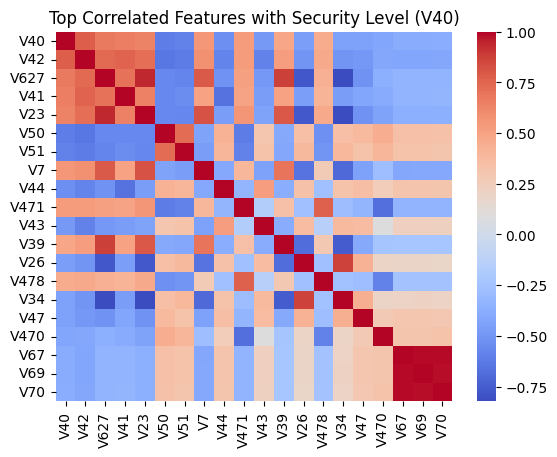

In [11]:
top_features = target_corr.abs().sort_values(ascending=False).head(20).index
sns.heatmap(numeric_df[top_features].corr(), fmt=".2f", cmap="coolwarm")
plt.title("Top Correlated Features with Security Level (V40)")
plt.show()

In [12]:
# correlation with respect to sensitive attribute
race_corr = numeric_df.corr()["majority race"].sort_values(ascending=False)
race_corr.head(20)

,majority race
majority race,1.000000
V446,0.292540
V285,0.286633
V286,0.224579
V23,0.206441
V349,0.205446
V75,0.196098
V627,0.193258
V353,0.192836
V39,0.178929


In [13]:
top_features = ["V42", "V627", "V41", "V23", "V7", "V471", "V39", "V478", "V45",
                "V561", "V485", "V560", "V492", "V28", "V35", "V499", "V487",
                "V349", "V363", "V473", "V49", "V37", "V30", "V364"]
X = numeric_df[top_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

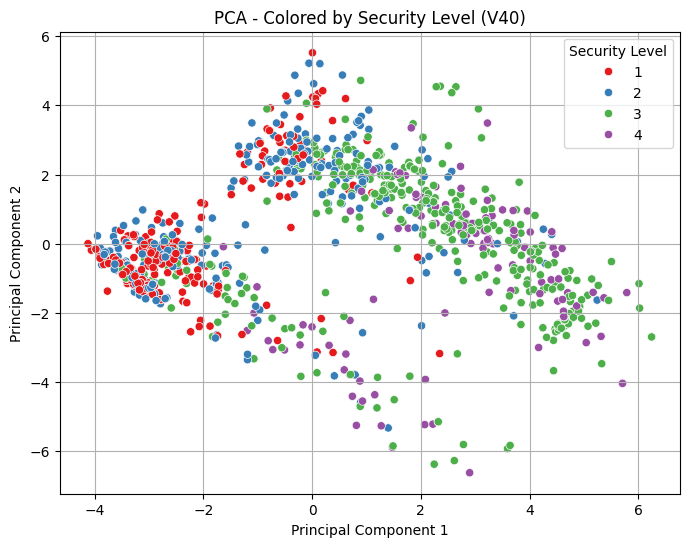

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df.loc[X.index, 'V40'], palette='Set1')
plt.title("PCA - Colored by Security Level (V40)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Security Level')
plt.grid(True)
plt.show()

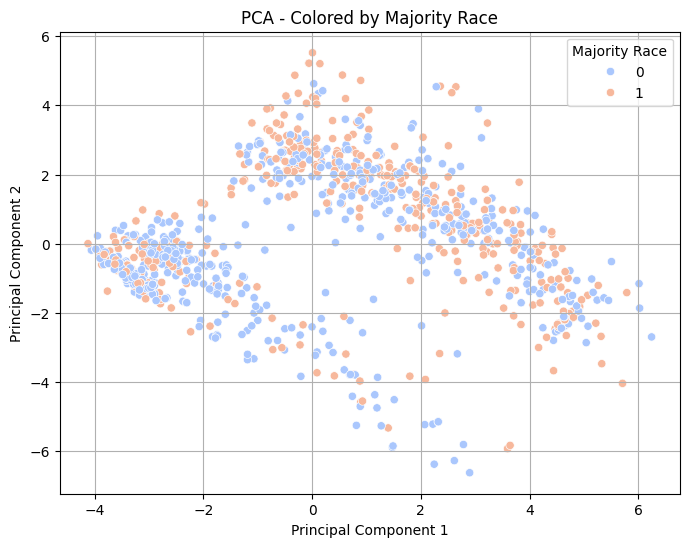

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df.loc[X.index, 'majority race'], palette='coolwarm')
plt.title("PCA - Colored by Majority Race")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Majority Race')
plt.grid(True)
plt.show()

In [16]:
X = df[top_features]
y = df['V40']

# lda
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda  = lda.transform(X_test_scaled)

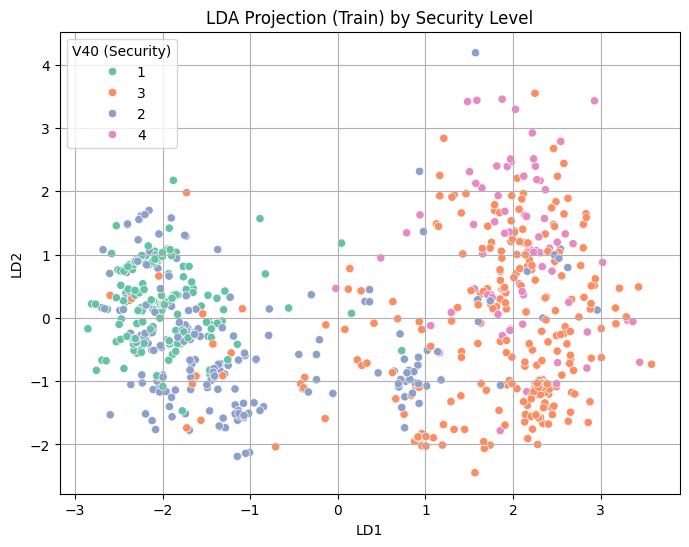

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_train_lda[:,0],
    y=X_train_lda[:,1],
    hue=y_train.astype(str),
    palette='Set2',
    legend='full'
)
plt.title("LDA Projection (Train) by Security Level")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(title="V40 (Security)")
plt.grid(True)
plt.show()

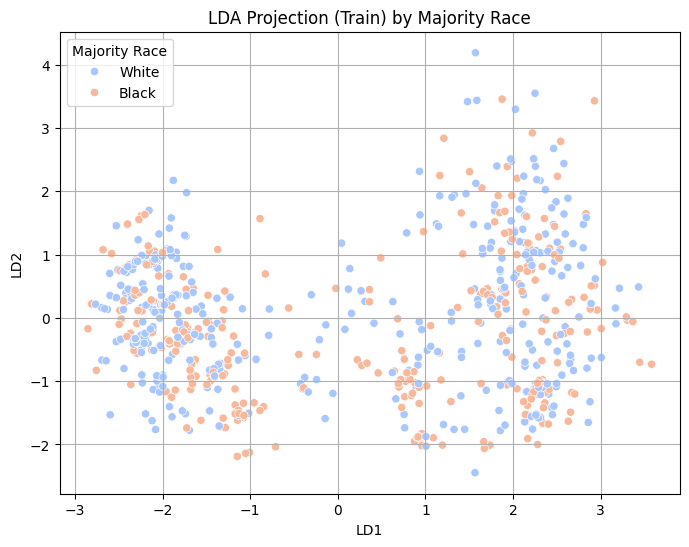

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_train_lda[:,0],
    y=X_train_lda[:,1],
    hue=df.loc[X_train.index,'majority race'].map({0:'White',1:'Black'}),
    palette='coolwarm',
    legend='full'
)
plt.title("LDA Projection (Train) by Majority Race")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(title="Majority Race")
plt.grid(True)
plt.show()

seems to be separation between Maximum and Minimum security levels, but no separation by race. still going to continue with counterfactual analysis to complete research pipeline.

In [19]:
X = df[top_features + ["majority race"]]
y = df["V40"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

In [20]:
# removing sensitive attribute
# random forests

X_train_rf = X_train.drop(columns=["majority race"])
X_test_rf = X_test.drop(columns=["majority race"])

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# logistic ordinal model

scaler = StandardScaler()
X_train_ord = scaler.fit_transform(X_train.drop(columns=["majority race"]))
X_test_ord = scaler.transform(X_test.drop(columns=["majority race"]))

ord_model = OrderedModel(y_train,
                         X_train_ord,
                         distr='logit')
ord_res = ord_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.788699
         Iterations: 67
         Function evaluations: 69
         Gradient evaluations: 69


In [22]:
def generate_counterfactuals(df, sensitive_attr="majority race"):
    counter_df = df.copy()
    counter_df[sensitive_attr] = 1 - counter_df[sensitive_attr]
    return counter_df

X_test_cf = generate_counterfactuals(X_test)
X_test_cf_rf = X_test_cf.drop(columns=["majority race"])
X_test_cf_ord = scaler.transform(X_test_cf_rf)

In [23]:
# predictions
# rf

y_pred_rf = rf_model.predict(X_test_rf)
y_pred_rf_cf = rf_model.predict(X_test_cf_rf)

# ordinal
y_pred_ord = ord_res.model.predict(ord_res.params, exog=X_test_ord)
y_pred_ord_cf = ord_res.model.predict(ord_res.params, exog=X_test_cf_ord)

In [24]:
pred_diff_rf = np.mean(y_pred_rf != y_pred_rf_cf)
pred_diff_ord = np.mean(y_pred_ord.argmax(axis=1) != y_pred_ord_cf.argmax(axis=1))

In [25]:
# RF metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cf_accuracy_rf = accuracy_score(y_test, y_pred_rf_cf)
pred_diff_rf = np.mean(y_pred_rf != y_pred_rf_cf)

# OR metrics
accuracy_ord = accuracy_score(y_test, y_pred_ord.argmax(axis=1))
cf_accuracy_ord = accuracy_score(y_test, y_pred_ord_cf.argmax(axis=1))
pred_diff_ord = np.mean(y_pred_ord.argmax(axis=1) != y_pred_ord_cf.argmax(axis=1))

results = pd.DataFrame({
    "Model": ["Random Forest", "Ordinal Regression"],
    "Accuracy": [accuracy_rf, accuracy_ord],
    "Counterfactual Accuracy": [cf_accuracy_rf, cf_accuracy_ord],
    "Prediction Diff": [pred_diff_rf, pred_diff_ord],
})

print(results.to_string(index=False))

             Model  Accuracy  Counterfactual Accuracy  Prediction Diff
     Random Forest  0.708709                 0.708709              0.0
Ordinal Regression  0.117117                 0.117117              0.0


race does not affect security level. want to look at max vs min security level bc there are clearer distinctions between the two in the clusters

In [26]:
# filter to get security levels 1 and 3
mask = df["V40"].isin([1, 3])
df_minmax = df[mask].copy()

In [27]:
X_minmax = df_minmax[top_features + ["majority race"]]
y_minmax = df_minmax["V40"].map({1: 0, 3: 1})

In [28]:
X_minmax_train, X_minmax_test, y_minmax_train, y_minmax_test = train_test_split(
    X_minmax, y_minmax, test_size=0.3, stratify=y_minmax, random_state=42)

In [29]:
# RF and ordinal models without sensitive attribute

rf_minmax = RandomForestClassifier(random_state=42)
rf_minmax.fit(X_minmax_train.drop(columns=["majority race"]), y_minmax_train)

log_minmax = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
log_minmax.fit(X_minmax_train.drop(columns=["majority race"]), y_minmax_train)

LogisticRegression(max_iter=5000, random_state=42)

In [30]:
def flip_race(X):
  cf = X.copy()
  cf["majority race"] = 1 - cf["majority race"]
  return cf

X_minmax_test_cf = flip_race(X_minmax_test)

In [31]:
y_pred_rf_minmax = rf_minmax.predict(X_minmax_test.drop(columns=["majority race"]))
y_pred_rf_minmax_cf = rf_minmax.predict(X_minmax_test_cf.drop(columns=["majority race"]))

y_pred_log_minmax = log_minmax.predict(X_minmax_test.drop(columns=["majority race"]))
y_pred_log_minmax_cf = log_minmax.predict(X_minmax_test_cf.drop(columns=["majority race"]))

In [32]:
for name, y_pred, y_pred_cf in [
    ("RF", y_pred_rf_minmax, y_pred_rf_minmax_cf),
    ("LogReg", y_pred_log_minmax, y_pred_log_minmax_cf)
]:
    acc = accuracy_score(y_minmax_test, y_pred)
    acc_cf = accuracy_score(y_minmax_test, y_pred_cf)
    pred_diff = np.mean(y_pred != y_pred_cf)
    print(f"{name}: acc={acc:.3f}, cf_acc={acc_cf:.3f}, pred_diff={pred_diff:.3f}")

RF: acc=0.971, cf_acc=0.971, pred_diff=0.000
LogReg: acc=0.947, cf_acc=0.947, pred_diff=0.000


In [33]:
df_minmax['majority race'].value_counts(normalize=True)

,proportion
majority race,
0,0.564841
1,0.435159


pred diff still is 0 -> no impact
I am going to try to upweight the Black majority facilities and still look at Max and Min facilities

In [34]:
# dynamic weight
race_counts = X_minmax_train["majority race"].value_counts()
white_count = race_counts.get(0, 0)
black_count = race_counts.get(1, 0)
weight_black = white_count / black_count if black_count > 0 else 1.0

In [35]:
sample_weights = np.where(
    X_minmax_train["majority race"] == 1,
    weight_black,
    1.0)

In [36]:
# RF
rf_minmax_weighted = RandomForestClassifier(random_state=42)
rf_minmax_weighted.fit(
    X_minmax_train.drop(columns=["majority race"]),
    y_minmax_train,
    sample_weight=sample_weights)

RandomForestClassifier(random_state=42)

In [37]:
# log regression bc only looking at binary security level
log_minmax_weighted = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
log_minmax_weighted.fit(
    X_minmax_train.drop(columns=["majority race"]),
    y_minmax_train,
    sample_weight=sample_weights)

LogisticRegression(max_iter=5000, random_state=42)

In [38]:
X_minmax_test_cf = flip_race(X_minmax_test)

In [39]:
y_pred_rf_w       = rf_minmax_weighted.predict(X_minmax_test.drop(columns=["majority race"]))
y_pred_rf_w_cf    = rf_minmax_weighted.predict(X_minmax_test_cf.drop(columns=["majority race"]))

y_pred_log_w      = log_minmax_weighted.predict(X_minmax_test.drop(columns=["majority race"]))
y_pred_log_w_cf   = log_minmax_weighted.predict(X_minmax_test_cf.drop(columns=["majority race"]))

In [40]:
for name, y_pred, y_pred_cf in [
    ("RF Weighted", y_pred_rf_w, y_pred_rf_w_cf),
    ("LogReg Weighted", y_pred_log_w, y_pred_log_w_cf)
]:
    acc       = accuracy_score(y_minmax_test, y_pred)
    acc_cf    = accuracy_score(y_minmax_test, y_pred_cf)
    pred_diff = np.mean(y_pred != y_pred_cf)
    print(f"{name}: acc={acc:.3f}, cf_acc={acc_cf:.3f}, pred_diff={pred_diff:.3f}")

RF Weighted: acc=0.967, cf_acc=0.967, pred_diff=0.000
LogReg Weighted: acc=0.947, cf_acc=0.947, pred_diff=0.000


Now going to try interaction variables. only doing ordinal regression

In [41]:
features = ["V42", "V627", "V41", "V23", "V7", "V471", "V39", "V478", "V45",
                "V561", "V485", "V560", "V492", "V28", "V35", "V499", "V487",
                "V349", "V363", "V473", "V49", "V37", "V30", "V364"]
sensitive = "majority race"
target = "V40"

for feat in features:
  numeric_df[f"{feat}_x_race"] = numeric_df[feat] * numeric_df[sensitive]


interaction_feats = [f"{feat}_x_race" for feat in features]
all_feats = features + [sensitive] + interaction_feats

X = numeric_df[all_feats]
y = numeric_df[target]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=[sensitive]))
X_test_scaled  = scaler.transform(X_test.drop(columns=[sensitive]))

X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    index=X_train.index,
    columns=X_train.drop(columns=[sensitive]).columns
)

In [44]:
ord_mod = OrderedModel(
    endog=y_train,
    exog=X_train_scaled_df,
    distr='logit'
)

ord_res = ord_mod.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.765797
         Iterations: 167
         Function evaluations: 169
         Gradient evaluations: 169


In [45]:
# predictions
pred_probs = ord_res.model.predict(ord_res.params, exog=X_test_scaled)
y_pred_ord = pred_probs.argmax(axis=1) + 1

In [46]:
# counterfacts

X_test_cf = X_test.copy()
X_test_cf[sensitive] = 1 - X_test_cf[sensitive]

for feat in features:
    X_test_cf[f"{feat}_x_race"] = X_test_cf[feat] * X_test_cf[sensitive]
X_test_cf_scaled = scaler.transform(X_test_cf.drop(columns=[sensitive]))

In [47]:
# counterfact preds
pred_probs_cf = ord_res.model.predict(ord_res.params, exog=X_test_cf_scaled)
y_pred_cf_ord = pred_probs_cf.argmax(axis=1) + 1

In [79]:
acc_inter = accuracy_score(y_test, y_pred_ord)

acc_inter_cf = accuracy_score(y_test, y_pred_cf_ord)
pred_diff_ord = np.mean(y_pred_ord != y_pred_cf_ord)
# print(f"Ordinal Logistic Regression Prediction Diff: {pred_diff_ord:.3f}")

results_inter = pd.DataFrame({
    "Model": ["Ordinal Regression w Interaction terms"],
    "Accuracy": [acc_inter],
    "Counterfactual Accuracy": [acc_inter_cf],
    "Prediction Diff": [pred_diff_ord],
})

print(results_inter.to_string(index=False))

Ordinal Logistic Regression Prediction Diff: 0.159
                                 Model  Accuracy  Counterfactual Accuracy  Prediction Diff
Ordinal Regression w Interaction terms  0.582583                 0.576577         0.159159


In [77]:
feature_names = ord_res.model.exog_names

coefs = ord_res.params.loc[feature_names]

top_drivers = coefs.abs().sort_values(ascending=False).head(10)
print("Top 10 drivers of the ordinal model (by |coef|):")
print(top_drivers)

Top 10 drivers of the ordinal model (by |coef|):
1/2           2.708309
V627          2.207219
V42           1.489815
3/4           1.439601
V23           1.230478
2/3           1.140132
V23_x_race    0.973708
V35_x_race    0.795748
V7_x_race     0.708801
V39_x_race    0.673286
dtype: float64


In [50]:
means = numeric_df[features].mean()

In [51]:
v23_min, v23_max = numeric_df["V23"].quantile([0.01, 0.99])
v23_grid = np.linspace(v23_min, v23_max, 100)

In [52]:
rows = []
for race in [0, 1]:
    for val in v23_grid:
        row = means.to_dict()
        row[sensitive] = race
        row["V23"] = val
        # recompute all race interactions
        for feat in features:
            row[f"{feat}_x_race"] = row[feat] * race
        rows.append(row)
grid = pd.DataFrame(rows)

In [53]:
# drop sensitive column and scaleing
Xg = grid.drop(columns=[sensitive])
Xg_scaled = scaler.transform(Xg)

In [54]:
# predict probabilities of params
probs = ord_res.model.predict(ord_res.params, exog=Xg_scaled)

In [55]:
# probability of maximum security
grid["P(MaxSecurity)"] = probs[:, 0]
grid["Race"] = grid[sensitive].map({0:"White-majority", 1:"Black-majority"})

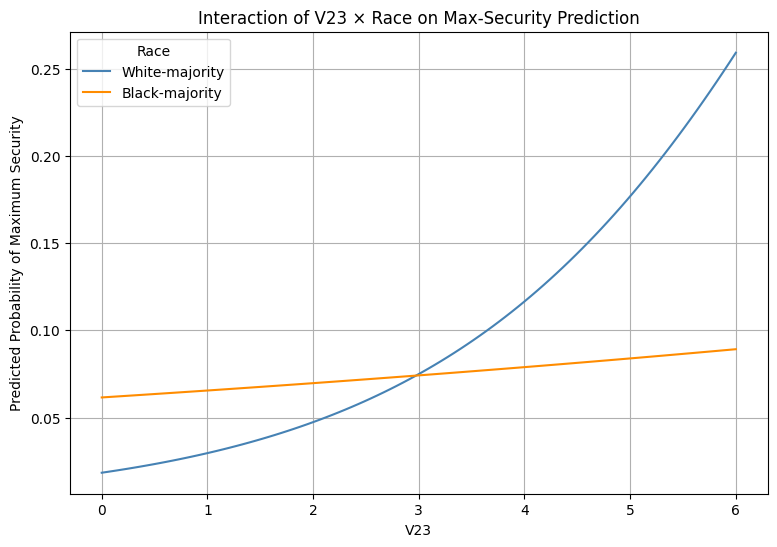

In [56]:
plt.figure(figsize=(9,6))
sns.lineplot(
    data=grid,
    x="V23",
    y="P(MaxSecurity)",
    hue="Race",
    palette=["steelblue","darkorange"]
)
plt.xlabel("V23")
plt.ylabel("Predicted Probability of Maximum Security")
plt.title("Interaction of V23 × Race on Max-Security Prediction")
plt.grid(True)
plt.show()

graph of v35

In [57]:
v35_min, v35_max = numeric_df["V35"].quantile([0.01, 0.99])
v35_grid = np.linspace(v35_min, v35_max, 100)

In [58]:
rows = []
for race in [0, 1]:
    for val in v35_grid:
        row = means.to_dict()
        row[sensitive] = race
        row["V35"] = val
        # recompute all race interactions
        for feat in features:
            row[f"{feat}_x_race"] = row[feat] * race
        rows.append(row)
grid = pd.DataFrame(rows)

In [59]:
Xg = grid.drop(columns=[sensitive])
Xg_scaled = scaler.transform(Xg)

In [60]:
probs = ord_res.model.predict(ord_res.params, exog=Xg_scaled)

In [61]:
grid["P(MaxSecurity)"] = probs[:, 0]
grid["Race"] = grid[sensitive].map({0:"White-majority", 1:"Black-majority"})

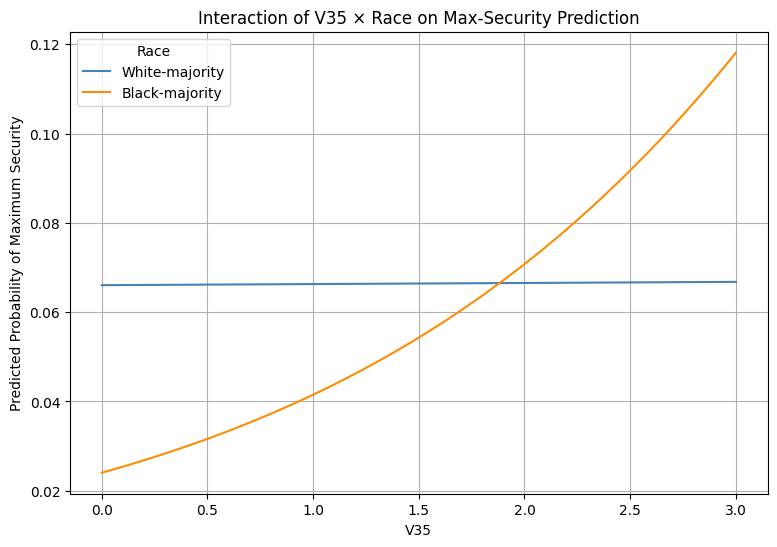

In [62]:
plt.figure(figsize=(9,6))
sns.lineplot(
    data=grid,
    x="V35",
    y="P(MaxSecurity)",
    hue="Race",
    palette=["steelblue","darkorange"]
)
plt.xlabel("V35")
plt.ylabel("Predicted Probability of Maximum Security")
plt.title("Interaction of V35 × Race on Max-Security Prediction")
plt.grid(True)
plt.show()

graphing v39

In [63]:
v39_min, v39_max = numeric_df["V39"].quantile([0.01, 0.99])
v39_grid = np.linspace(v39_min, v39_max, 100)

In [64]:
rows = []
for race in [0, 1]:
    for val in v39_grid:
        row = means.to_dict()
        row[sensitive] = race
        row["V39"] = val
        # recompute all race interactions
        for feat in features:
            row[f"{feat}_x_race"] = row[feat] * race
        rows.append(row)
grid = pd.DataFrame(rows)

In [65]:
Xg = grid.drop(columns=[sensitive])
Xg_scaled = scaler.transform(Xg)

In [66]:
probs = ord_res.model.predict(ord_res.params, exog=Xg_scaled)

In [67]:
grid["P(MaxSecurity)"] = probs[:, 0]
grid["Race"] = grid[sensitive].map({0:"White-majority", 1:"Black-majority"})

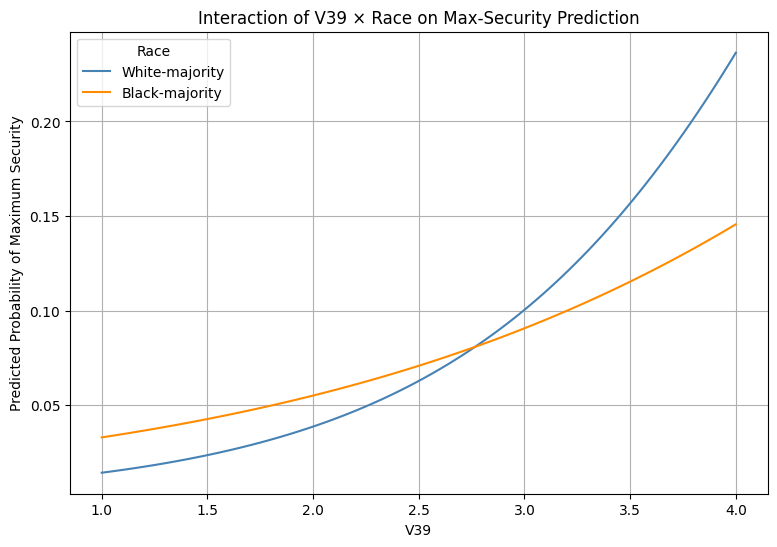

In [68]:
plt.figure(figsize=(9,6))
sns.lineplot(
    data=grid,
    x="V39",
    y="P(MaxSecurity)",
    hue="Race",
    palette=["steelblue","darkorange"]
)
plt.xlabel("V39")
plt.ylabel("Predicted Probability of Maximum Security")
plt.title("Interaction of V39 × Race on Max-Security Prediction")
plt.grid(True)
plt.show()

graphing v7

In [69]:
v7_min, v7_max = numeric_df["V7"].quantile([0.01, 0.99])
v7_grid = np.linspace(v7_min, v7_max, 100)

In [70]:
rows = []
for race in [0, 1]:
    for val in v7_grid:
        row = means.to_dict()
        row[sensitive] = race
        row["V7"] = val
        # recompute all race interactions
        for feat in features:
            row[f"{feat}_x_race"] = row[feat] * race
        rows.append(row)
grid = pd.DataFrame(rows)

In [71]:
Xg = grid.drop(columns=[sensitive])
Xg_scaled = scaler.transform(Xg)

In [72]:
probs = ord_res.model.predict(ord_res.params, exog=Xg_scaled)

In [73]:
grid["P(MaxSecurity)"] = probs[:, 0]
grid["Race"] = grid[sensitive].map({0:"White-majority", 1:"Black-majority"})

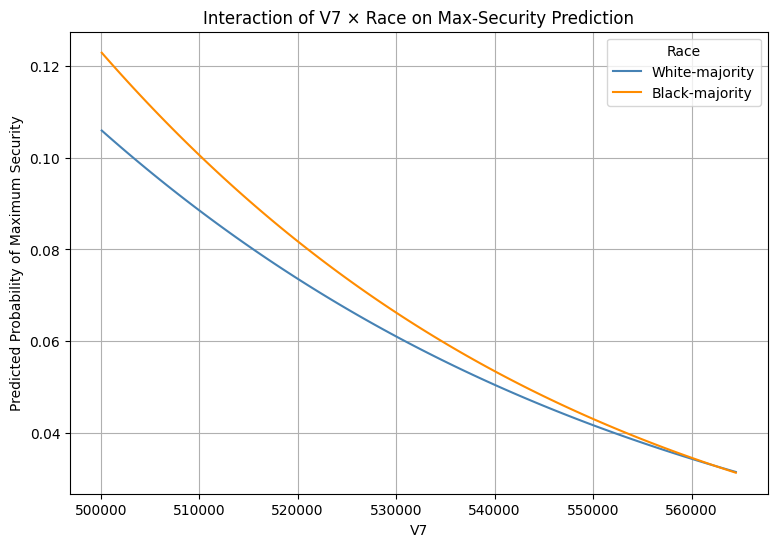

In [74]:
plt.figure(figsize=(9,6))
sns.lineplot(
    data=grid,
    x="V7",
    y="P(MaxSecurity)",
    hue="Race",
    palette=["steelblue","darkorange"]
)
plt.xlabel("V7")
plt.ylabel("Predicted Probability of Maximum Security")
plt.title("Interaction of V7 × Race on Max-Security Prediction")
plt.grid(True)
plt.show()